In [1]:
import requests
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from Scott_keys import gkey

In [2]:
# import delivery csv
delivery_data = pd.read_csv("delivery_dataframe_run.csv")
delivery_df = pd.DataFrame(delivery_data)
delivery_df.head()

,Zip Code,# Pizza/Chinese Restaurants,# That Deliver,% That Deliver,% No Cars
0,10001,50,35.0,0.700000,82.6
1,10002,160,54.0,0.337500,81.6
2,10003,89,62.0,0.696629,78.3
3,10004,20,12.0,0.600000,81.1
4,10005,6,4.0,0.666667,83.5


In [3]:
# format percentage columns so they are the same
delivery_df['% That Deliver']= delivery_df['% That Deliver']*100
delivery_df['% That Deliver']= delivery_df['% That Deliver'].map('{:,.1f}'.format)
delivery_df['% No Cars']= delivery_df['% No Cars'].map('{:,.1f}'.format)
delivery_df.head()


,Zip Code,# Pizza/Chinese Restaurants,# That Deliver,% That Deliver,% No Cars
0,10001,50,35.0,70.0,82.6
1,10002,160,54.0,33.8,81.6
2,10003,89,62.0,69.7,78.3
3,10004,20,12.0,60.0,81.1
4,10005,6,4.0,66.7,83.5


In [4]:
# double check dtypes to be sure we can run functions
delivery_df.dtypes
delivery_df["% That Deliver"]= delivery_df["% That Deliver"].astype(float)
delivery_df["% No Cars"]= delivery_df["% No Cars"].astype(float)


In [5]:
# find the avg % delivery and avg % no cars
delivery_df.mean()


Zip Code                       10815.107955
# Pizza/Chinese Restaurants       27.551136
# That Deliver                    14.988636
% That Deliver                    54.009091
% No Cars                         50.311932
dtype: float64

Text(0.5, 1.0, 'NYC Restaurant Delivery')

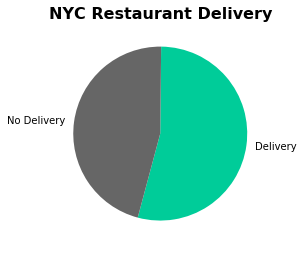

In [6]:
# make a pie chart of the overall % of delivery restaurants in NYC

labels= ['Delivery', 'No Delivery']
x= [54,46]
colors= ['#00CC99','#666666']

plt.pie(x, labels=labels, colors=colors, startangle=255)
plt.title("NYC Restaurant Delivery",fontsize=16, fontweight="bold")


In [77]:
plt.savefig("Delivery_Pie.png")

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'NYC HH Vehicle Ownership')

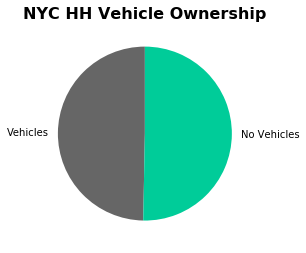

In [7]:
# make a pie chart of the overall % of NYC HH with no vehicles

labels= ['Vehicles', 'No Vehicles']
x= [49.7,50.3]
colors= ['#666666','#00CC99']

plt.pie(x, labels=labels, colors=colors, startangle=90)
plt.title("NYC HH Vehicle Ownership",fontsize=16, fontweight="bold")


In [79]:
plt.savefig("Vehicle_Pie.png")

<Figure size 432x288 with 0 Axes>

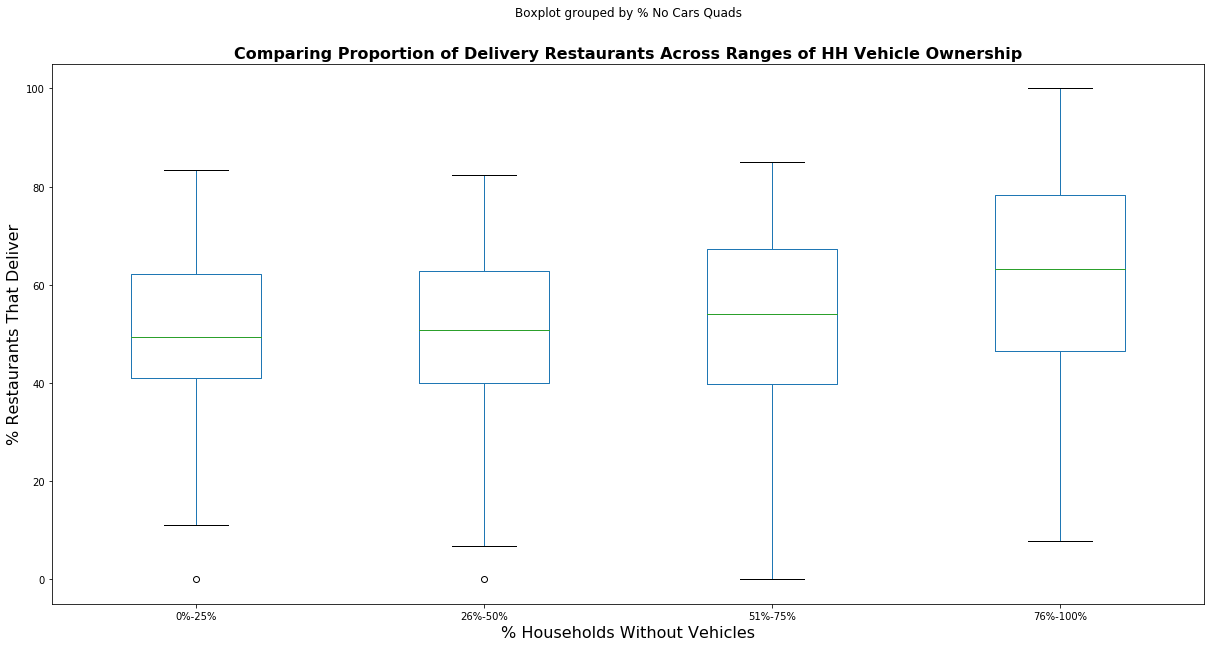

In [8]:
# bin the data into quadrants for easier visualization

bins = 4
group_names = ["0%-25%", "26%-50%", "51%-75%", "76%-100%"]
delivery_df["% No Cars Quads"] = pd.cut(delivery_df["% No Cars"], bins, labels=group_names)

# create a boxplot
fig = delivery_df.boxplot("% That Deliver", 
                          by="% No Cars Quads", 
                          figsize=(20, 10),
                         )
fig.set_title('Comparing Proportion of Delivery Restaurants Across Ranges of HH Vehicle Ownership', fontsize=16, fontweight="bold")
fig.set_xlabel("% Households Without Vehicles",fontsize=16)
fig.set_ylabel("% Restaurants That Deliver",fontsize=16)
fig.grid(False)




In [108]:
plt.savefig("Delivery_boxplot.png")

<Figure size 432x288 with 0 Axes>

In [12]:
# calculate P value
slope, intercept, r_value, p_value, std_err = stats.linregress(delivery_df['% No Cars'], delivery_df['% That Deliver'])
print(p_value)


0.0012373177024357993


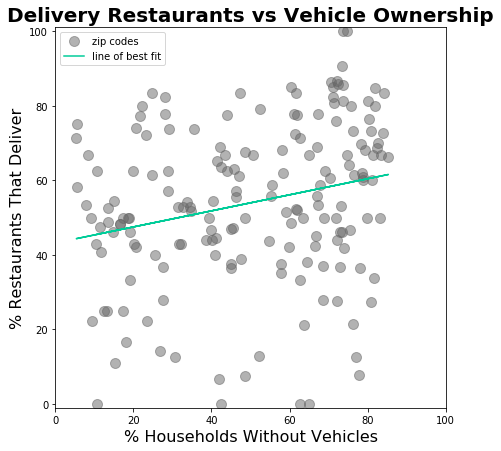

In [17]:
plt.figure(figsize=(7,7))
plt.plot(delivery_df['% No Cars'], delivery_df['% That Deliver'], 'o', color= '#666666', alpha=.5, label='zip codes', markersize=10)
plt.plot(delivery_df['% No Cars'], intercept + slope*(delivery_df['% No Cars']), color='#00CC99', label='line of best fit')
plt.legend()
plt.ylim([-1,101]) 
plt.xlim([0,100])
plt.title("Delivery Restaurants vs Vehicle Ownership",fontsize=20, fontweight="bold")
plt.xlabel("% Households Without Vehicles",fontsize=16)
plt.ylabel("% Restaurants That Deliver",fontsize=16)
plt.show()

In [ ]:
plt.savefig("Delivery_boxplot.png")